In [1]:
using Plots, LinearAlgebra

In [2]:
function get_bloch_spectrum(V0, kl, q, l_max)
    l = -l_max:l_max
    H = LinearAlgebra.SymTridiagonal((2 .* l .+ q/kl) .^ 2 .+ V0/2, -V0/4 * ones(length(l) - 1))
    E, psi = eigen(H)
    return real.(E), psi'
end

get_bloch_spectrum (generic function with 1 method)

In [3]:
to_pos_basis(phi_l, kl, l_max) = (x) -> sum(phi_l .* exp.(2im .* kl .* x .* (-l_max:l_max)))

func_wannier(bloch_fn, k, R) = (x) -> 1/length(k) * sum([fn(x) for fn in bloch_fn] .* exp.(1im .* k .* (x - R)))

func_wannier (generic function with 1 method)

In [4]:
V0, kl = 10., π; #potential depth, period

In [5]:
l_max = 10
q = range(start = -kl, stop = kl, length = 100)

E = Array{Float64}(undef, length(q), 2 * l_max + 1);
psi = Array{Float64}(undef, length(q), 2 * l_max + 1, 2 * l_max + 1);

In [6]:
for (i, k) in enumerate(q)
    E[i, :], psi[i, :, :] = get_bloch_spectrum(V0, kl, k, l_max)
end

In [7]:
bloch = [to_pos_basis(psi[i, 1, :], kl, l_max) for i in 1:size(psi)[1]]
wannier = func_wannier(bloch, q, 0)

x = range(start = -5, stop = 5, length = 1001); #domain

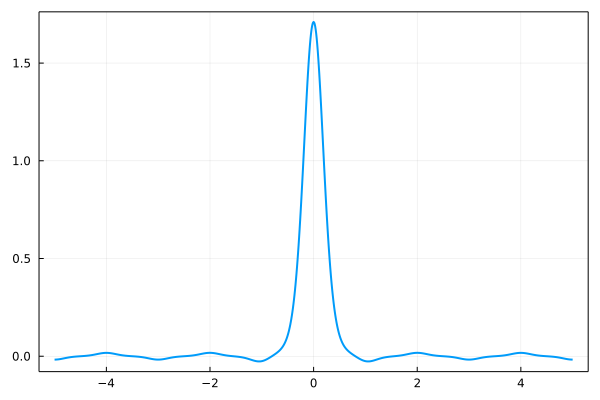

In [8]:
plot(x, real.(wannier.(x)), lw = 2, label = "", framestyle = :box)

In [9]:
tunneling_1D(Ri, Rj, bloch_energy, k) = - 1/length(k) * real.(sum(bloch_energy .* exp.(-1im * k * (Rj - Ri))))

tunneling_1D (generic function with 1 method)

In [10]:
# kl = π
# l_max = 10
# q = range(start = -kl, stop = kl, length = 700)
# E = Array{Float64}(undef, length(q), 2 * l_max + 1)

# V = range(start = 0., stop = 20., length = 100)
# t = Array{Float64}(undef, length(V))
# J = Array{Float64}(undef, length(V))

# for (i, V0) in enumerate(V)
#     for (j, k) in enumerate(q)
#         E[j, :], _ = get_bloch_spectrum(V0, kl, k, l_max)
#     end
#     t[i] = tunneling_1D(0, 0, E[:, 1], q)
#     J[i] = tunneling_1D(0, 2, E[:, 1], q)
# end

In [11]:
using FFTW

In [38]:
n, L = 5000, 10.
x_grid = range(start = -L/2, stop = L/2, length = n)
k_grid = range(start = -π/dx, stop = π/dx, length = n)

dx = x_grid.step.hi
dk = k_grid.step.hi

y = conj.(wannier.(x)) .* wannier.(x .- 1);

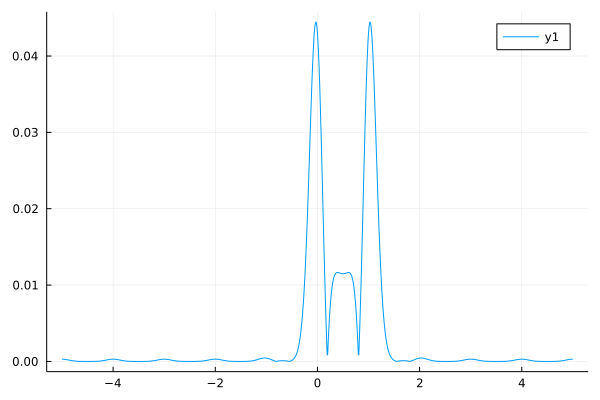

attempt to save state beyond implementation limit


In [31]:
plot(x, abs.(y))

In [18]:
yk = fftshift(fft(y));
ykminus = fftshift(ifft(y));

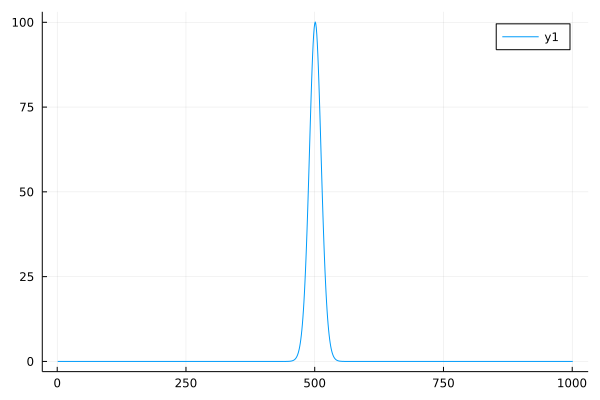

In [32]:
plot(abs.(yk))

In [89]:
using QuadGK

In [118]:
quadgk((x) -> abs(wannier(x)) ^ 2, -Inf, Inf, rtol=1e-4)

DomainError: DomainError with -0.9999999999999964:
integrand produced NaN in the interval (-1.0, -0.9999999999999929)

In [117]:
sum(yk .* yk)

5.088576582490907e6 - 5.820766091346741e-11im